## PHYS-467 Machine Learning for Physicists
# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Linear Regression in 1D

In [2]:
# Generate noisy linear data

n = 100
X = np.random.rand(n, 1)
y = 2 * X + 3 + .25 * np.random.randn(n, 1)

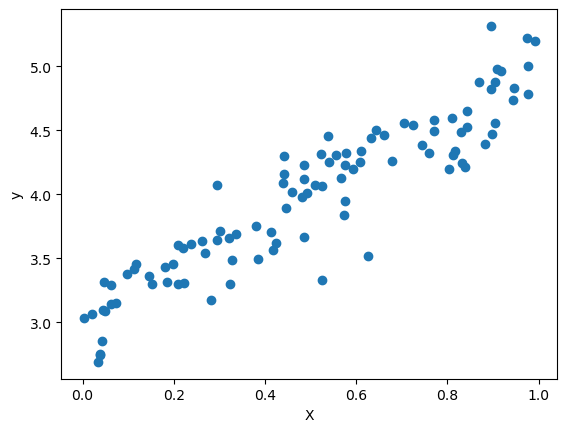

In [3]:
# Plot the training data

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [4]:
# Write a function to compute the linear-regression predictor in closed form

def linear_regression(X, y):
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [5]:
# Print the predicted weights (coefficient + bias)

w = linear_regression(X, y)
print("weight: ", w[0][0], "bias: ", w[1][0])

weight:  1.9320947421216317 bias:  3.015265341850413


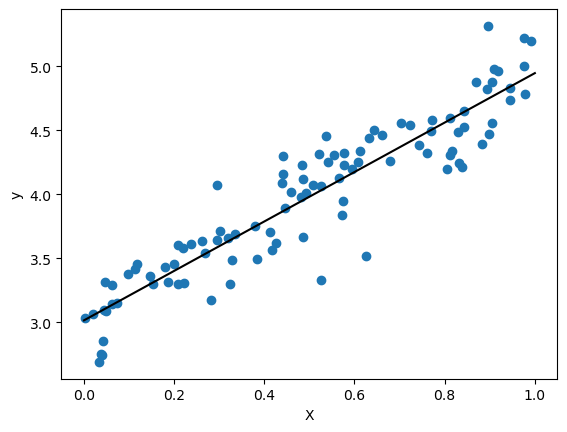

In [6]:
# Plot the training points and the predictor evaluated on a set of test points

X_test_n = np.linspace(0, 1, 10)
y_test_pred = w[0] * X_test_n + w[1]

plt.scatter(X, y)
plt.plot(X_test_n, y_test_pred, 'k')
plt.xlabel('X')
plt.ylabel('y');

In [7]:
# Repeat with Scikit-learn

from sklearn.linear_model import LinearRegression

linear_regression_sk = LinearRegression()
linear_regression_sk.fit(X, y)
linear_regression_sk.coef_, linear_regression_sk.intercept_

(array([[1.93209474]]), array([3.01526534]))

In [8]:
# Pseudoinverse implementation (same as sk-learn)
# Hint: np.linalg.ping

def linear_regression_pinv(X, y):
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.pinv(X) @ y
    return w

w_pinv = linear_regression_pinv(X, y)
w_pinv

array([[1.93209474],
       [3.01526534]])

# Exercise 2: High Dimensions

Alpha 2.0 Rank:  50


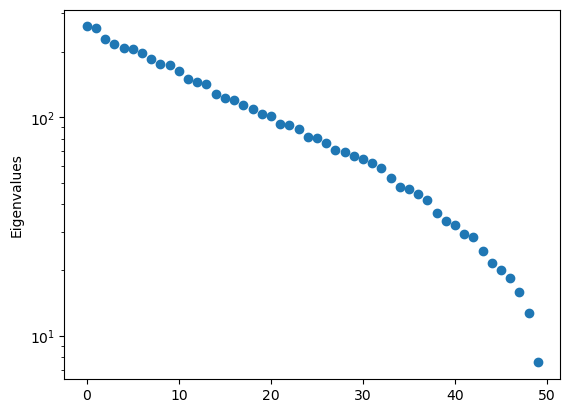

Alpha 1.0 Rank:  50


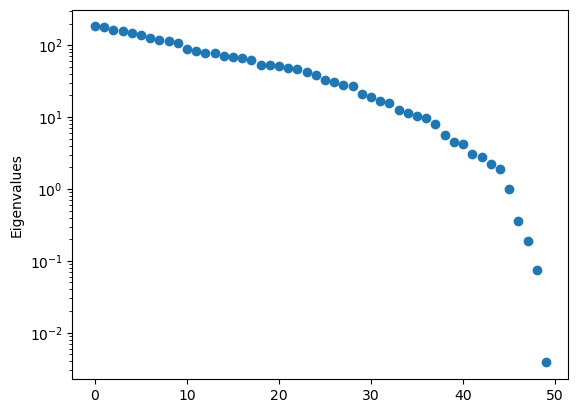

Alpha 0.6 Rank:  30


/home/lykex/mambaforge/envs/datasci/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


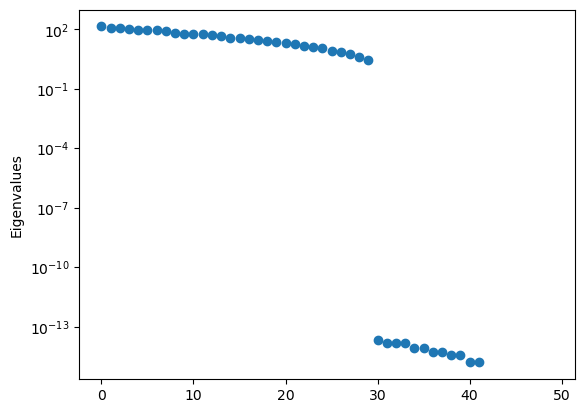

Alpha 0.4 Rank:  20


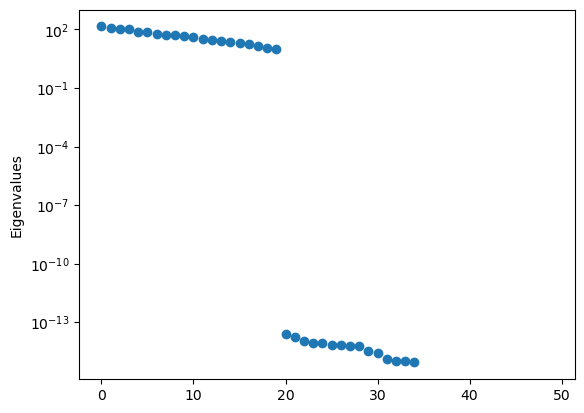

In [9]:
# Compute the rank and plot the eigenvalues of the matrix X.T X varying alpha = n / d

d = 50

for n in [100, 50, 30, 20]:
    X = np.random.randn(n, d)

    rank = np.linalg.matrix_rank(X.T @ X)
    print("Alpha", n/d, "Rank: ", rank)

    eigvals = np.linalg.eigvals(X.T @ X)
    eigvals = np.sort(eigvals)[::-1]
    plt.plot(eigvals, 'o')
    plt.ylabel('Eigenvalues')
    plt.yscale('log')
    plt.show();

Alpha 2.0 Rank:  50


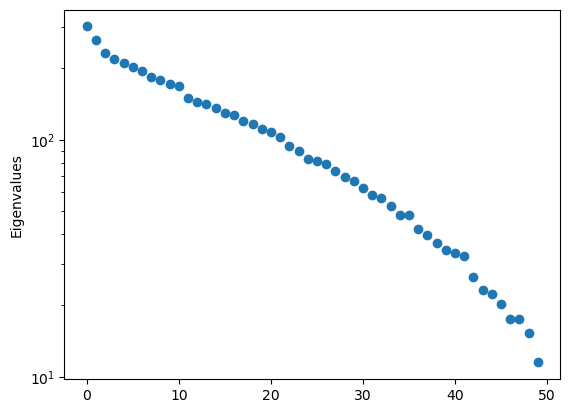

Alpha 1.0 Rank:  50


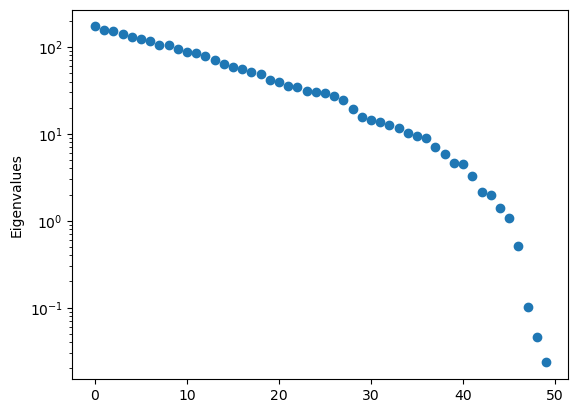

Alpha 0.6 Rank:  50


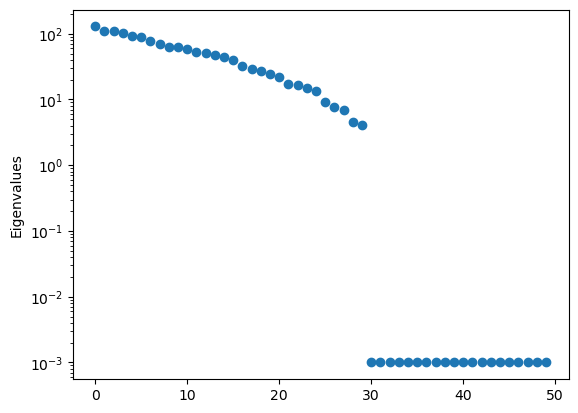

Alpha 0.4 Rank:  50


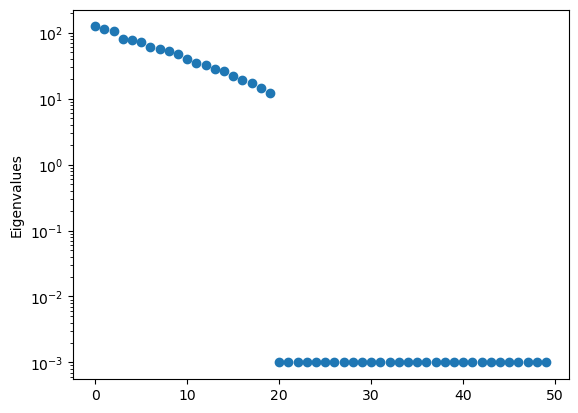

In [10]:
# Add a regularisation. What happens to the spectrum?

reg = 0.001

d = 50

for n in [100, 50, 30, 20]:

    X = np.random.randn(n, d)
    m = X.T @ X + reg * np.eye(d)
    rank = np.linalg.matrix_rank(m)
    print("Alpha", n/d, "Rank: ", rank)

    eigvals = np.linalg.eigvals(m)
    eigvals = np.sort(eigvals)[::-1]
    plt.plot(eigvals, 'o')
    plt.ylabel('Eigenvalues')
    plt.yscale('log')
    plt.show();

Text(0, 0.5, 'MSE')

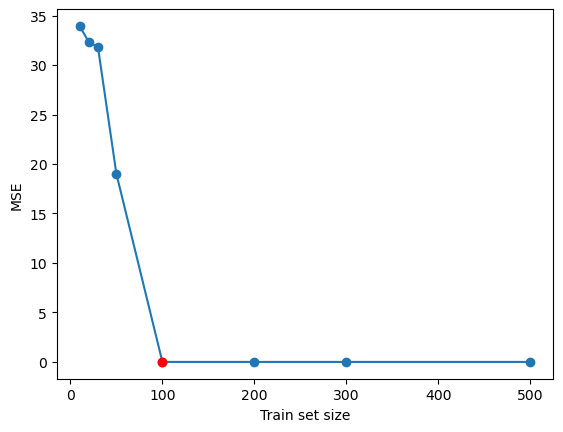

In [11]:
# Plot the test error vs alpha for high-dimensional linear data in the absence of noise (interpolation threshold when n = d)

from sklearn.metrics import mean_squared_error

d = 99

train_set_sizes = np.array([500, 300, 200, 100, 50, 30, 20, 10])

X = np.random.rand(np.max(train_set_sizes) + 500, d)
w = 2 * np.random.randn(d, 1)
y = X.dot(w) + 2

mse = []
for n in train_set_sizes:
    X_train_n = X[:n]
    y_train_n = y[:n]
    X_test_n = X[-500:]
    y_test_n = y[-500:]

    #### YOUR CODE GOES HERE
    res = linear_regression_sk.fit(X_train_n, y_train_n)
    mse.append(mean_squared_error(y_test_n, X_test_n @ res.coef_.T + res.intercept_))

#### YOUR CODE GOES HERE
plt.plot(train_set_sizes, mse, 'o-')
plt.plot(train_set_sizes[3], mse[3], 'ro')
plt.xlabel('Train set size')
plt.ylabel('MSE')

# Exercise 3: Real Data - Boston House Prices

In [12]:
# Load the Boston house prices dataset (goal: predict the price of a house from 13 different features)

from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
california.data = california.data[:506]
california.target = california.target[:506]

In [14]:
california.data.shape

(506, 8)

In [15]:
california.target.shape

(506,)

In [42]:
# Split data in training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.4, random_state=0)

In [43]:
from sklearn.preprocessing import normalize

X_train = normalize(X_train)
X_test = normalize(X_test)

In [44]:
# Perform linear regression on the training set

linear_regression_sk = LinearRegression()

#### YOUR CODE GOES HERE

res = linear_regression_sk.fit(X_train, y_train)
y_pred = res.predict(X_test)
mse = mean_squared_error(y_test, y_pred)



MSE:  0.6451985723499603


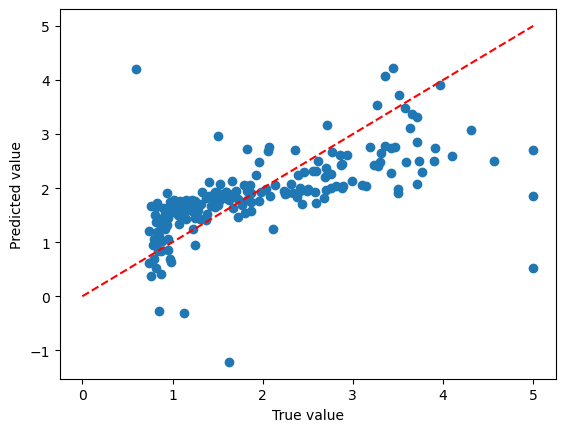

In [45]:
# Print the test error and plot the predicted prices vs the actual ones
print("MSE: ", mse)
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show();

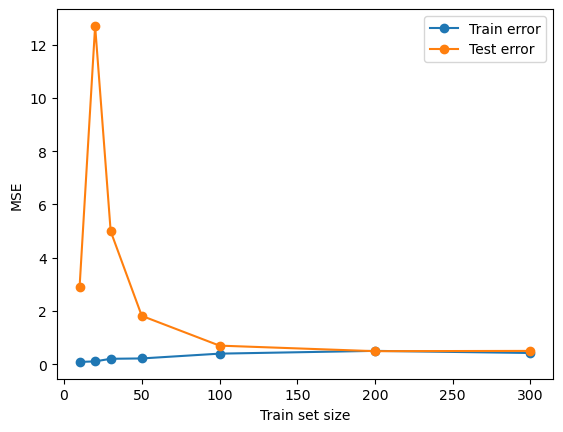

In [41]:
# Vary the training set size n and plot the learning curves (test and train error vs n)
# Comments: the train error is growing while the test error is going down, test error > train error, the curves are converging

trainset_sizes = [10, 20, 30, 50, 100, 200, 300]

train_errors = []
test_errors = []

for n in trainset_sizes:
    X_train_n = normalize(california.data[0:n])
    y_train_n = california.target[0:n]
    X_test_n = normalize(california.data[n:])
    y_test_n = california.target[n:]

    res = linear_regression_sk.fit(X_train_n, y_train_n)
    y_pred_train = res.predict(X_train_n)
    y_pred_test = res.predict(X_test_n)

    train_errors.append(mean_squared_error(y_train_n, y_pred_train))
    test_errors.append(mean_squared_error(y_test_n, y_pred_test))

plt.plot(trainset_sizes, train_errors, 'o-', label='Train error')
plt.plot(trainset_sizes, test_errors, 'o-', label='Test error')
plt.xlabel('Train set size')
plt.ylabel('MSE')
plt.legend()
plt.show();

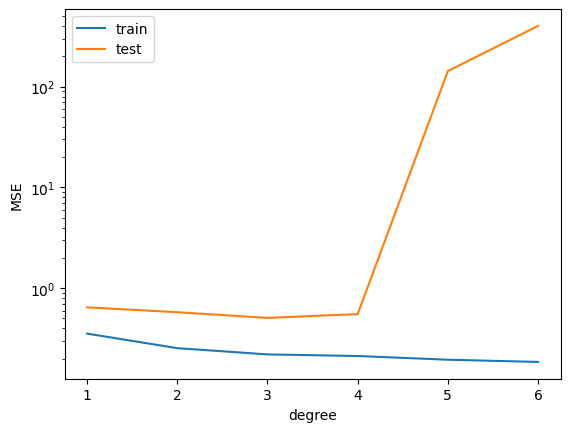

In [47]:
# Implement *non-interacting* polynomial-features regression (not present in sklearn, write a function using numpy) and vary the degree from 1 to 6. Plot the results.
# Comments: bias-variance tradeoff, U-shaped curve (while train error keeps going down, i.e. overfitting)

def non_interacting_polyfeat(X, degree):
    return np.hstack([X**i for i in range(1,degree+1)])

train_errors = []
test_errors = []

for degree in range(1,7):

    X_train_poly = non_interacting_polyfeat(X_train, degree)
    X_test_poly = non_interacting_polyfeat(X_test, degree)
    reg = linear_regression_sk.fit(X_train_poly, y_train)

    l_train = mean_squared_error(reg.predict(X_train_poly), y_train)
    l_test = mean_squared_error(reg.predict(X_test_poly), y_test)
    train_errors.append(l_train)
    test_errors.append(l_test)

plt.plot(range(1,7), train_errors, label="train")
plt.plot(range(1,7), test_errors, label="test")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.yscale("log")
plt.legend()
plt.show();

    

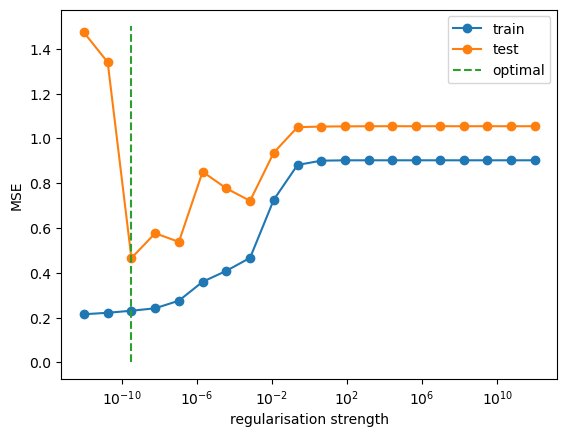

In [60]:
# Add different regularisers to the degree-6 model. Plot the results and find the best value.

from sklearn.linear_model import Ridge

reg_strengths = np.logspace(-12, 12, 20)

train_errors = []
test_errors = []

for reg_strenght in reg_strengths:

    X_train_poly = non_interacting_polyfeat(X_train, degree=6)
    X_test_poly = non_interacting_polyfeat(X_test, degree=6)

    ridge_regression = Ridge(alpha=reg_strenght)
    reg = ridge_regression.fit(X_train_poly, y_train)

    #### YOUR CODE GOES HERE
    train_errors.append(mean_squared_error(reg.predict(X_train_poly), y_train))
    test_errors.append(mean_squared_error(reg.predict(X_test_poly), y_test))

plt.plot(reg_strengths, train_errors, "o-", label="train")
plt.plot(reg_strengths, test_errors, "o-", label="test")
plt.plot([reg_strengths[2], reg_strengths[2]], [0, 1.5], "--", label="optimal")
plt.xlabel("regularisation strength")
plt.ylabel("MSE")
plt.xscale("log")
plt.legend()
plt.show();


# Exercise 4: Polynomial Regression, Underfitting & Overfitting

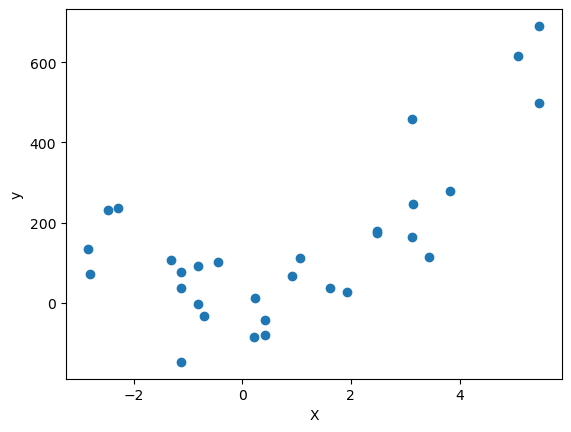

In [61]:
# Generate and plot quadratic noisy data

n = 30
X = 10 * np.random.rand(n, 1) - 3
y = 1 + 2 * X + 20 * X**2 + 100 * np.random.randn(n, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y');

In [75]:
# Do linear regression and evaluate on 100 testing data points

#### YOUR CODE GOES HERE
n = 100
X_test = np.linspace(-3, 5, n).reshape(-1, 1)
y_test = 1 + 2 * X_test + 20 * X_test**2 + 100 * np.random.randn(n, 1)

reg = linear_regression_sk.fit(X, y)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


MSE:  21578.272692665094


In [76]:
# Do polynomial-features regression with degree 2

from sklearn.preprocessing import PolynomialFeatures

poly_feat2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_feat2.fit_transform(X)

#### YOUR CODE GOES HERE

reg = linear_regression_sk.fit(X_poly2, y)
y_pred = reg.predict(poly_feat2.fit_transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


MSE:  15030.749569519021


In [77]:
# Repeat with a high-degree polynomial, e.g. 15

#### YOUR CODE GOES HERE
poly_feat2 = PolynomialFeatures(degree=15, include_bias=False)
X_poly2 = poly_feat2.fit_transform(X)

#### YOUR CODE GOES HERE

reg = linear_regression_sk.fit(X_poly2, y)
y_pred = reg.predict(poly_feat2.fit_transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  202926.17865481015


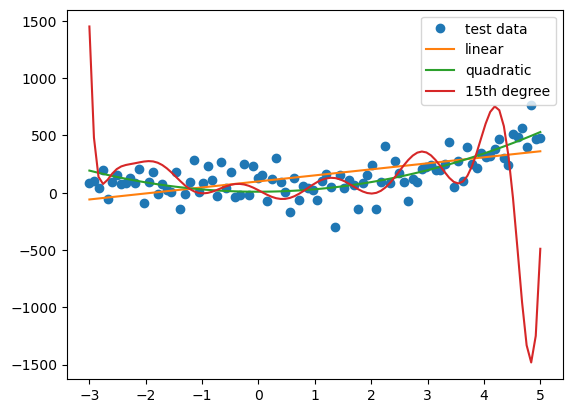

In [78]:
# Plot the 3 predictors (the linear one is underfitting, the high-degree one is overfitting, i.e. fitting noise)

#### YOUR CODE GOES HERE
def poly_fit(X, X_test, y, y_test, degree):
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_feat.fit_transform(X)

    reg = linear_regression_sk.fit(X_poly, y)
    y_pred = reg.predict(poly_feat.fit_transform(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    return y_pred

y_pred_1 = poly_fit(X, X_test, y, y_test, 1)
y_pred_2 = poly_fit(X, X_test, y, y_test, 2)
y_pred_15 = poly_fit(X, X_test, y, y_test, 15)
plt.plot(X_test, y_test, "o", label="test data")
plt.plot(X_test, y_pred_1, label="linear")
plt.plot(X_test, y_pred_2, label="quadratic")
plt.plot(X_test, y_pred_15, label="15th degree")
plt.xlabel
plt.legend()
plt.show();

/home/lykex/mambaforge/envs/datasci/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.27058e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lykex/mambaforge/envs/datasci/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.29659e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lykex/mambaforge/envs/datasci/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.21461e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lykex/mambaforge/envs/datasci/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.71351e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrit

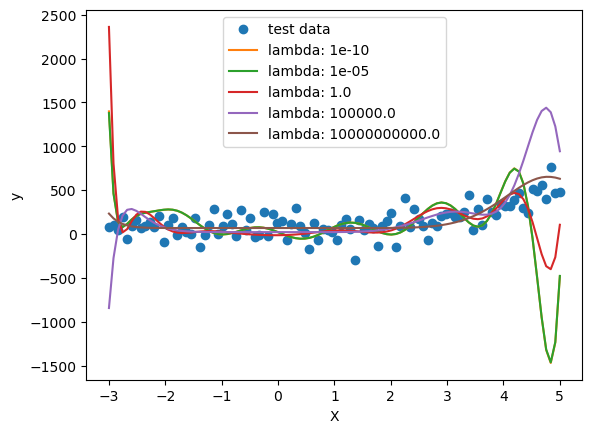

In [86]:
# add regularization as a homework

#### YOUR CODE GOES HERE
def ridge_fit(X, X_test, y, y_test, reg_strength):
    poly_feat = PolynomialFeatures(degree=15, include_bias=False)
    X_poly = poly_feat.fit_transform(X)

    ridge_regression = Ridge(alpha=reg_strength)
    reg = ridge_regression.fit(X_poly, y)
    y_pred = reg.predict(poly_feat.fit_transform(X_test))
    # mse = mean_squared_error(y_test, y_pred)
    return y_pred

plt.plot(X_test, y_test, "o", label="test data")
for r in np.logspace(-10, 10, 5):
    y_pred = ridge_fit(X, X_test, y, y_test, r)
    plt.plot(X_test, y_pred, label="lambda: " + str(r))
    plt.xlabel("X")
    plt.ylabel("y")
# plt.xlim([-2,2])
plt.legend()
plt.show();